In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Pandas
Permet de manipuler des données structurées.

In [38]:
data=pd.read_csv('src/data1.csv')#Lire le fichier csv.
data.head()#Affiche les 5 premières lignes du dataframe.

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
0,1,143.635030,1,3,3,1967,1,1,48,8.297631,5.935734,602134.816747
1,2,287.678577,1,2,1,1949,0,1,37,6.061466,10.827392,591425.135386
2,3,232.998485,1,3,2,1923,1,0,14,2.911442,6.904599,464478.696880
3,4,199.664621,5,2,2,1918,0,0,17,2.070949,8.284019,583105.655996
4,5,89.004660,4,3,3,1999,1,0,34,1.523278,14.648277,619879.142523


In [40]:
#Renommer les colonnes en français
nouveaux_noms_colonnes={
    "Square_Feet":"pieds_carres",#Evitez de nommer les colonnes comme suit: pieds carrés
    "Num_Bedrooms":"nombre_chambres",
    "Num_Bathrooms":"nombre_douches",
    "Num_Floors":"nombre_etages",
    "Year_Built":"annee_construction",
    "Has_Garden":"avec_jardin",
    "Has_Pool":"avec_piscine",
    "Garage_Size":"taille_garage",
    "Location_Score":"score_localisationto",
    "Distance_to_Center":"distance_centre_ville",
    "Price":"prix"
}

data.rename(columns=nouveaux_noms_colonnes,inplace=True)
#Inplace permet de modifier directement le dataframe. Sa valeur par défaut est False.
#Si vous auriez défini inplace à False vous auriez dû réaffecter la valeur data comme ci dessous.
# data=data.rename(columns=nouveaux_noms_colonnes,inplace=False)
data.head(2)

,ID,pieds_carres,nombre_chambres,nombre_douches,nombre_etages,annee_construction,avec_jardin,avec_piscine,taille_garage,score_localisationto,distance_centre_ville,prix
0,1,143.635030,1,3,3,1967,1,1,48,8.297631,5.935734,602134.816747
1,2,287.678577,1,2,1,1949,0,1,37,6.061466,10.827392,591425.135386


In [41]:
data.info()#Info sur les colonnes et sur le dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     500 non-null    int64  
 1   pieds_carres           500 non-null    float64
 2   nombre_chambres        500 non-null    int64  
 3   nombre_douches         500 non-null    int64  
 4   nombre_etages          500 non-null    int64  
 5   annee_construction     500 non-null    int64  
 6   avec_jardin            500 non-null    int64  
 7   avec_piscine           500 non-null    int64  
 8   taille_garage          500 non-null    int64  
 9   score_localisationto   500 non-null    float64
 10  distance_centre_ville  500 non-null    float64
 11  prix                   500 non-null    float64
dtypes: float64(4), int64(8)
memory usage: 47.0 KB


Changons le type de données des colonnes catégorielles/discrètes listé ci-dessous  en type object pour des raisons d'études statistiques: 
- avec_jardin
- avec_piscine
- annee_construction

In [43]:
data[['avec_jardin','avec_piscine','annee_construction']]=data[['avec_jardin','avec_piscine','annee_construction']].astype(object)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     500 non-null    int64  
 1   pieds_carres           500 non-null    float64
 2   nombre_chambres        500 non-null    int64  
 3   nombre_douches         500 non-null    int64  
 4   nombre_etages          500 non-null    int64  
 5   annee_construction     500 non-null    object 
 6   avec_jardin            500 non-null    object 
 7   avec_piscine           500 non-null    object 
 8   taille_garage          500 non-null    int64  
 9   score_localisationto   500 non-null    float64
 10  distance_centre_ville  500 non-null    float64
 11  prix                   500 non-null    float64
dtypes: float64(4), int64(5), object(3)
memory usage: 47.0+ KB


In [44]:
data.describe()#Statistique des données numériques.

,ID,pieds_carres,nombre_chambres,nombre_douches,nombre_etages,taille_garage,score_localisationto,distance_centre_ville,prix
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,174.640428,2.958000,1.976000,1.964000,30.174000,5.164410,10.469641,582209.629529
std,144.481833,74.672102,1.440968,0.820225,0.802491,11.582575,2.853489,5.588197,122273.390345
min,1.000000,51.265396,1.000000,1.000000,1.000000,10.000000,0.004428,0.062818,276892.470136
25%,125.750000,110.319923,2.000000,1.000000,1.000000,20.000000,2.760650,6.066754,503080.344140
50%,250.500000,178.290937,3.000000,2.000000,2.000000,30.000000,5.206518,10.886066,574724.113347
75%,375.250000,239.031220,4.000000,3.000000,3.000000,41.000000,7.732933,15.072590,665942.301274
max,500.000000,298.241199,5.000000,3.000000,3.000000,49.000000,9.995439,19.927966,960678.274291


In [46]:
data.describe(include=['object'])#Statistique des données catégorielles.

,annee_construction,avec_jardin,avec_piscine
count,500,500,500
unique,121,2,2
top,1959,1,0
freq,12,268,254


In [ ]:
data.isnull().values.any()#Vérifiez si le dataframe contient des valeurs manquantes, généralement marquées comme NAN.

False

Les valeurs manquantes peuvent être remplacées par :
- La moyenne. Example $[2,NAN,10]$->$[2,6,10]$; 
- La médiane;
- Le mode (valeurs catégorielles)
- Ou des méthodes plus avancées 

Supposons que des valeurs soient manquantes dans la colonne « pieds carrés ». Nous aurions remplacé ces valeurs codé ci-dessous.

In [48]:
_ = data[['pieds_carres']].fillna(data[['pieds_carres']].mean(numeric_only=True))#Undescore est généralement utilisé pour nommer une variable que l'on ne souhaite pas utilisée.

## Matplotlib & Seaborn
Bibliothèques de visualisation

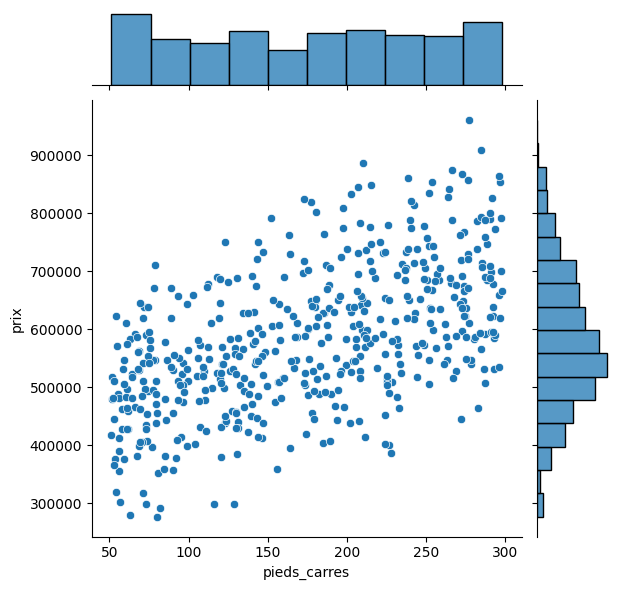

In [49]:
sns.jointplot(x="pieds_carres",y="prix",data=data)

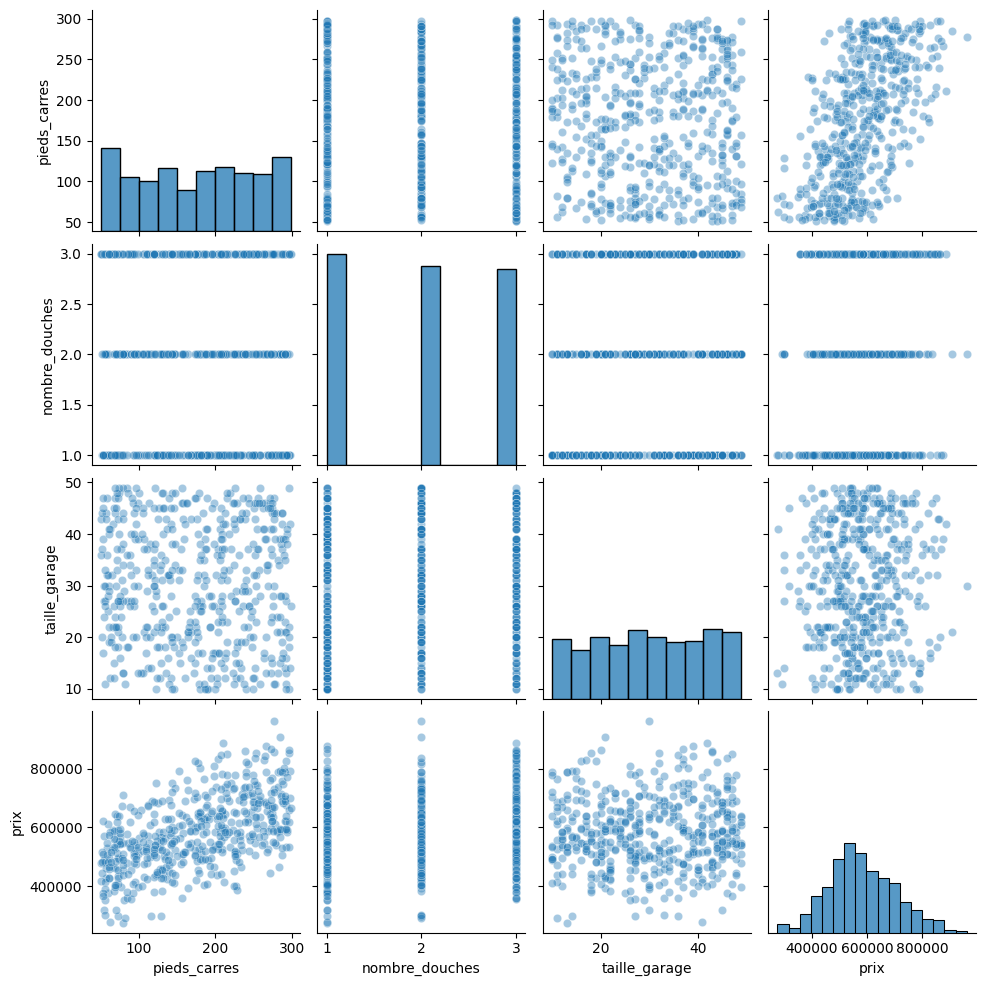

In [50]:
sns.pairplot(data[['pieds_carres','nombre_douches','taille_garage','prix']],kind='scatter',plot_kws={"alpha":0.4})